<a href="https://colab.research.google.com/github/Vijaylaxmihiremath1308/MLActivity/blob/main/pgm6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def locally_weighted_regression(X, Y, tau, x_query):
    # Compute weights as a 1D array
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))

    # Add intercept term to X
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    x_query_augmented = np.array([1, x_query[0]])

    # Compute weighted normal equation
    W = np.diag(weights)  # Create a diagonal matrix for weights
    X_transpose_W = X_augmented.T @ W
    theta = np.linalg.pinv(X_transpose_W @ X_augmented) @ X_transpose_W @ Y
    return x_query_augmented @ theta

In [ ]:
db = pd.read_csv('/content/drive/MyDrive/housing.csv')
db.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
X = db[['housing_median_age']].values
Y = db['median_house_value'].values

In [ ]:
X_Query = np.array([41]); # Predicting for this input
tau = 0.1 #bandwidth parameter
y_query = locally_weighted_regression(X, Y, tau, X_Query)
print(f"Predicted median house value for a house with 30 years old: {y_query}")

Predicted median house value for a house with 30 years old: 197253.77364864876


Predicted median house value for housing median age 10: 193923.82789030776
Predicted median house value for housing median age 20: 198521.40640040388
Predicted median house value for housing median age 30: 205106.16873237348
Predicted median house value for housing median age 40: 214431.02664171837
Predicted median house value for housing median age 50: 242024.36162520997


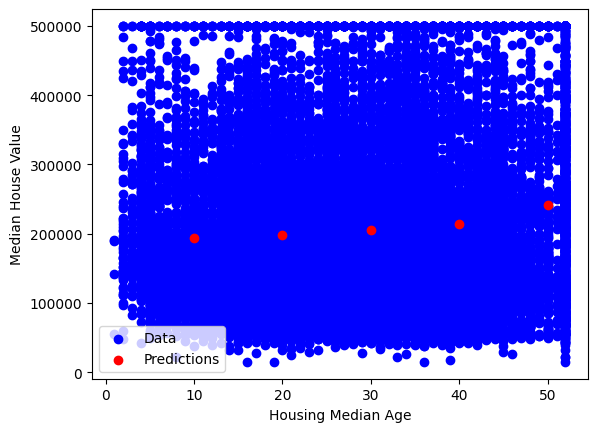

In [ ]:
# Predict for multiple x_query values
x_queries = np.array([10, 20, 30, 40, 50])  # Replace with your desired query points
predictions = []

for x_query in x_queries:
    x_query = np.array([x_query])  # Ensure x_query is a 1D array
    y_query = locally_weighted_regression(X, Y, tau=10, x_query=x_query)
    predictions.append(y_query)
    print(f"Predicted median house value for housing median age {x_query[0]}: {y_query}")

# Optionally, visualize the predictions
plt.scatter(X, Y, color='blue', label='Data')
plt.scatter(x_queries, predictions, color='red', label='Predictions')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def locally_weighted_regression(X, Y, tau, x_query):
    # Compute weights for each training example
    diff = X - x_query
    weights = np.exp(-np.sum(diff**2, axis=1) / (2 * tau**2))

    # Add intercept to X and x_query
    X_aug = np.c_[np.ones(X.shape[0]), X]
    x_query_aug = np.r_[1, x_query]

    # Create diagonal weight matrix
    W = np.diag(weights)

    # Compute theta using weighted normal equation
    XTW = X_aug.T @ W
    theta = np.linalg.pinv(XTW @ X_aug) @ XTW @ Y
    return x_query_aug @ theta


In [ ]:

# ---- Load Housing Data ----
db = pd.read_csv('/content/drive/MyDrive/housing.csv')
X_housing = db[['housing_median_age', 'total_rooms', 'median_income']].values
Y_housing = db['median_house_value'].values

In [ ]:
# LWR prediction for housing
x_query_housing = np.array([30, 2000, 5])
y_query_housing = locally_weighted_regression(X_housing, Y_housing, tau=10, x_query=x_query_housing)
print(f"LWR Housing prediction for {x_query_housing}: {y_query_housing}")

LWR Housing prediction for [  30 2000    5]: 250589.7882698623


In [ ]:

# ---- Load Diabetes Data ----
diabetes = load_diabetes()
X_diabetes = diabetes.data[:, [0, 1, 2]]  # 3 features
Y_diabetes = diabetes.target

x_query_diabetes = np.array([0.03, -0.04, 0.02])
y_query_diabetes = locally_weighted_regression(X_diabetes, Y_diabetes, tau=0.5, x_query=x_query_diabetes)
print(f"LWR Diabetes prediction for {x_query_diabetes}: {y_query_diabetes}")

LWR Diabetes prediction for [ 0.03 -0.04  0.02]: 176.21393807315877


In [ ]:

# ---- KNN Regression and Comparison ----
# Housing Dataset
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_housing, Y_housing, test_size=0.2, random_state=42)
knn_h = KNeighborsRegressor(n_neighbors=5)
knn_h.fit(X_train_h, y_train_h)
y_pred_knn_h = knn_h.predict(X_test_h)
mse_knn_h = mean_squared_error(y_test_h, y_pred_knn_h)
print(f"KNN Housing MSE: {mse_knn_h}")

KNN Housing MSE: 11860950580.124304


In [ ]:
# Diabetes Dataset
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_diabetes, Y_diabetes, test_size=0.2, random_state=42)
knn_d = KNeighborsRegressor(n_neighbors=5)
knn_d.fit(X_train_d, y_train_d)
y_pred_knn_d = knn_d.predict(X_test_d)
mse_knn_d = mean_squared_error(y_test_d, y_pred_knn_d)
print(f"KNN Diabetes MSE: {mse_knn_d}")

KNN Diabetes MSE: 4251.008988764045


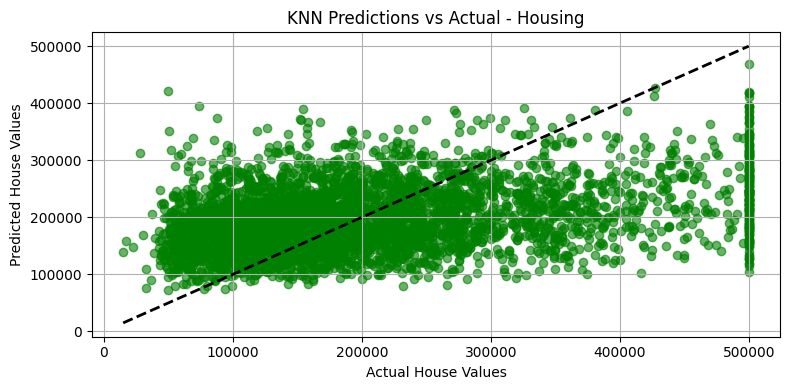

In [ ]:
# ---- Optional: Plot for Housing ----
plt.figure(figsize=(8, 4))
plt.scatter(y_test_h, y_pred_knn_h, alpha=0.6, color='green')
plt.plot([y_test_h.min(), y_test_h.max()], [y_test_h.min(), y_test_h.max()], 'k--', lw=2)
plt.xlabel("Actual House Values")
plt.ylabel("Predicted House Values")
plt.title("KNN Predictions vs Actual - Housing")
plt.grid(True)
plt.tight_layout()
plt.show()